In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn.linear_model

In [2]:
#Reading the dataset

data = pd.read_csv('train-2.csv')

In [3]:
#Getting to know the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Part-1
#Identifying missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Replacing the missing values with the average age of passengers
data['Age'] = data['Age'].fillna(data['Age'].mean())
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

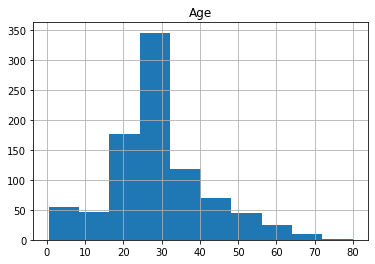

In [7]:
#Visualize the 'Age' column with a histogram
data.hist(column='Age')

In [8]:
#Part-2
#Adding a new column called "total" in order to calculate the fare per person
data.insert(8, "total", (data['SibSp']+data['Parch']+1))

In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,total,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,2,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,2,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,1,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,2,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,1,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,1,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,1,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,4,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,1,111369,30.0000,C148,C


In [10]:
#Adding a new variable called "FarePP"
data.insert(11, "FarePP", (data['Fare']/data['total']))

In [11]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,total,Ticket,Fare,FarePP,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,2,A/5 21171,7.2500,3.62500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,2,PC 17599,71.2833,35.64165,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,1,STON/O2. 3101282,7.9250,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,2,113803,53.1000,26.55000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,1,373450,8.0500,8.05000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,1,211536,13.0000,13.00000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,1,112053,30.0000,30.00000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,4,W./C. 6607,23.4500,5.86250,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,1,111369,30.0000,30.00000,C148,C


In [12]:
#Part-3
#Encoding categorical variable "Sex"
data['Sex'].replace(['male','female'],[0,1], inplace= True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,total,Ticket,Fare,FarePP,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,2,A/5 21171,7.2500,3.62500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,2,PC 17599,71.2833,35.64165,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,1,STON/O2. 3101282,7.9250,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,2,113803,53.1000,26.55000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,1,373450,8.0500,8.05000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,1,211536,13.0000,13.00000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,1,112053,30.0000,30.00000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,4,W./C. 6607,23.4500,5.86250,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,1,111369,30.0000,30.00000,C148,C


In [14]:
#Part-4
#Selecting the independent variables "Age," "Sex," "Fare per person," "Pclass", and "Parch" as predictors
#Defining the response variable as "Survived" 

x = data [['Age','Sex','FarePP','Pclass','Parch']]
y = data.Survived

x.shape

(891, 5)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [16]:
#Logistic Regression
model = sklearn.linear_model.LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [17]:
#Accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       141
           1       0.80      0.67      0.73        82

    accuracy                           0.82       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.82      0.81       223



In [18]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors = 5, metric ="minkowski", p=2)
Classifier.fit(x_train, y_train)

y_pred = Classifier.predict(x_test)

In [19]:
#Accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       141
           1       0.71      0.55      0.62        82

    accuracy                           0.75       223
   macro avg       0.74      0.71      0.72       223
weighted avg       0.75      0.75      0.74       223



In [20]:
#Support Vector Machines (SVM)
from sklearn.svm import SVC #Support Vector Classifier
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit (x_train, y_train)
y_pred = classifier.predict(x_test)

In [21]:
#Accuracy
matrix = classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       141
           1       0.75      0.67      0.71        82

    accuracy                           0.80       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.80      0.80      0.80       223



In [22]:
#Logistic Regression Model performed the best based on the evaluation metrics